In [3]:
import geopandas as gpd

In [4]:
gdf = gpd.read_file("CongDist.json")

In [5]:
gdf.head()

,STATEFP,CD116FP,AFFGEOID,GEOID,LSAD,CDSESSN,ALAND,AWATER,geometry
0,17,10,5001600US1710,1710,C2,116,777404163,31605644,"POLYGON ((-87.89799 42.49388, -87.89814 42.479..."
1,47,06,5001600US4706,4706,C2,116,16770155959,324676580,"POLYGON ((-87.11498 36.64241, -87.11744 36.628..."
2,48,06,5001600US4806,4806,C2,116,5564805243,255530191,"POLYGON ((-97.32137 32.64374, -97.32177 32.643..."
3,48,07,5001600US4807,4807,C2,116,419784487,3069802,"POLYGON ((-95.58480 29.93299, -95.58895 29.930..."
4,48,26,5001600US4826,4826,C2,116,2349987793,191353567,"POLYGON ((-97.39267 33.18351, -97.39359 33.153..."


In [6]:
len(gdf)

441

In [7]:
c = list(gdf.columns)
c.remove("geometry")
c.remove("STATEFP")
gdf.drop(columns=c, inplace=True, axis=1)
gdf.head()

,STATEFP,geometry
0,17,"POLYGON ((-87.89799 42.49388, -87.89814 42.479..."
1,47,"POLYGON ((-87.11498 36.64241, -87.11744 36.628..."
2,48,"POLYGON ((-97.32137 32.64374, -97.32177 32.643..."
3,48,"POLYGON ((-95.58480 29.93299, -95.58895 29.930..."
4,48,"POLYGON ((-97.39267 33.18351, -97.39359 33.153..."


# filter, ri=44, tx=48, va=51

In [8]:
fips = ["44", "48", "51"]

In [9]:
stateGDF = []
for fip in fips:
    stateGDF.append(gdf[gdf["STATEFP"] == fip])

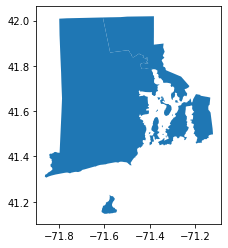

In [10]:
stateGDF[0].plot()

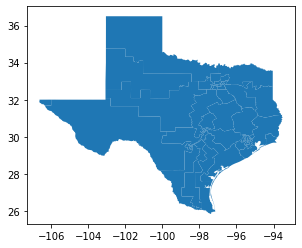

In [11]:
stateGDF[1].plot()

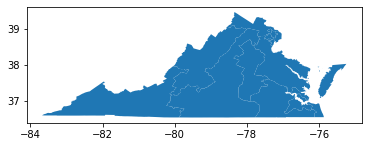

In [12]:
stateGDF[2].plot()

In [13]:
ids = {"RI":stateGDF[0], "TX":stateGDF[1], "VA":stateGDF[2]}
for i, gdf in ids.items():
    gdf.to_file(i+"_Congressional_Border.json", driver="GeoJSON")